## Pizza2vec build ipynb
### Karl Konz

To download the Yelp data set, you will need to register for the data set and choose whether to download JSON or data in SQL format.
The data is slightly smaller in JSON, so I chose to opt for less overhead. Below we use the codecs and os packages to read in the business records and write to disk. This is a lean version of the Patrick Harrison tutorial, with the addition of creating a html bokeh plot for later embedding and clustering to better interpret the t-sne reduction results.

### Read the data

In [16]:
# import the desired packages
import os
import codecs

# Create a data_directory path object.
data_directory = os.path.join('..', 'data')

# Join the path where the data is located 
# to the name of the yelp business dataset
businesses_filepath = os.path.join(data_directory,
                                   'business.json')

# Using codecs, read the data, and print the first business record.
with codecs.open(businesses_filepath, encoding='utf_8') as f:
    first_business_record = f.readline() 
print(first_business_record)

{"business_id": "YDf95gJZaq05wvo7hTQbbQ", "name": "Richmond Town Square", "neighborhood": "", "address": "691 Richmond Rd", "city": "Richmond Heights", "state": "OH", "postal_code": "44143", "latitude": 41.5417162, "longitude": -81.4931165, "stars": 2.0, "review_count": 17, "is_open": 1, "attributes": {"RestaurantsPriceRange2": 2, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "BikeParking": true, "WheelchairAccessible": true}, "categories": ["Shopping", "Shopping Centers"], "hours": {"Monday": "10:00-21:00", "Tuesday": "10:00-21:00", "Friday": "10:00-21:00", "Wednesday": "10:00-21:00", "Thursday": "10:00-21:00", "Sunday": "11:00-18:00", "Saturday": "10:00-21:00"}}



Next we will do the same for the review records.

In [18]:
# create a review file path object
review_json_filepath = os.path.join(data_directory,
                                    'review.json')

# iterate through the review data and print the first review record.
with codecs.open(review_json_filepath, encoding='utf_8') as f:
    first_review_record = f.readline()
print(first_review_record)

{"review_id":"VfBHSwC5Vz_pbFluy07i9Q","user_id":"cjpdDjZyprfyDG3RlkVG3w","business_id":"uYHaNptLzDLoV_JZ_MuzUA","stars":5,"date":"2016-07-12","text":"My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible.\n\nThe hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow umbrellas for t

Below we read all of the restaurants in the Yelp data set and print the number of restaurants included in the dataset.

In [20]:
import json

restaurant_ids = set()

# open the businesses file
with codecs.open(businesses_filepath, encoding='utf_8') as f:
    
    # iterate through each line (json record) in the file
    for business_json in f:
        
        # convert the json record to a Python dict
        business = json.loads(business_json)
        
        # if this business is not a restaurant, skip to the next one
        if u'Restaurants' not in business[u'categories']:
            continue
            
        # add the restaurant business id to our restaurant_ids set
        restaurant_ids.add(business[u'business_id'])

# turn restaurant_ids into a frozenset, as we don't need to change it anymore
restaurant_ids = frozenset(restaurant_ids)

# print the number of unique restaurant ids in the dataset
print('{:,}'.format(len(restaurant_ids)), u'restaurants in the dataset.')

51,613 restaurants in the dataset.


In [21]:
business

{'address': '540 Marks St',
 'attributes': {'BikeParking': True,
  'BusinessAcceptsCreditCards': True,
  'BusinessParking': {'garage': False,
   'lot': True,
   'street': False,
   'valet': False,
   'validated': False},
  'RestaurantsPriceRange2': 1,
  'WheelchairAccessible': True},
 'business_id': 'scMIE4jyGp7FkWrMKAgjxA',
 'categories': ['Fashion',
  'Shopping',
  'Food',
  'Department Stores',
  'Mobile Phones',
  'Grocery'],
 'city': 'Henderson',
 'hours': {},
 'is_open': 0,
 'latitude': 36.0607079,
 'longitude': -115.0332406,
 'name': 'Walmart',
 'neighborhood': '',
 'postal_code': '89014',
 'review_count': 42,
 'stars': 2.5,
 'state': 'NV'}

Next, we will create a new file that contains only the text from reviews about restaurants, with one review per line in the file.

In [23]:
# Create an intermediate directory path object
intermediate_directory = os.path.join('..', 'intermediate')

# Create the text file object for all the reviews.
review_txt_filepath = os.path.join(intermediate_directory,
                                   'review_text_all.txt')

Below we write the reivews to disk. Then print out the number of reviews and the length in time to run the code.

In [24]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:
    
    review_count = 0

    # create & open a new file in write mode
    with codecs.open(review_txt_filepath, 'wb', encoding='utf_8') as review_txt_file:

        # open the existing review json file
        with codecs.open(review_json_filepath, encoding='utf_8') as review_json_file:

            # loop through all reviews in the existing file and convert to dict
            for review_json in review_json_file:
                review = json.loads(review_json)

                # if this review is not about a restaurant, skip to the next one
                if review[u'business_id'] not in restaurant_ids:
                    continue
                
                if 'pizza' not in review[u'text']:
                    continue

                # write the restaurant review as a line in the new file
                # escape newline characters in the original review text
                review_txt_file.write(review[u'text'].replace('\n', '\\n') + '\n')
                review_count += 1

    print(u'''Text from {:,} restaurant reviews
              written to the new txt file.'''.format(review_count))
    
else:
    
    with codecs.open(review_txt_filepath, encoding='utf_8') as review_txt_file:
        for review_count, line in enumerate(review_txt_file):
            pass
        
    print(u'Text from {:,} restaurant reviews in the txt file.'.format(review_count + 1))

Text from 193,145 restaurant reviews in the txt file.
CPU times: user 4 s, sys: 38.7 ms, total: 4.04 s
Wall time: 4.06 s


### Pre-processing

First we will segement text of complete reviews into sentences and normalize the text.
Read in the spacy, pandas, gensim, natural language tool kit, and itertools packages.

In [25]:
# Load packages
import spacy
import pandas as pd
import itertools as it
from nltk.corpus import stopwords
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

Create a spacy object, and a unigram sentence path.

In [38]:
#create an english spacy object
nlp = spacy.load('en')
# create a path file for the unigram sentences.
unigram_sentences_filepath = os.path.join(intermediate_directory,
                                          'unigram_sentences_all.txt')

Next, create some helper functions for tokenization, new line formating, and lemmatization.

In [ ]:

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def line_review(filename):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for review in f:
            yield review.replace('\\n', '\n')
            
def lemmatized_sentence_corpus(filename):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    # For each review apply spacy nlp.pipe in 10,000 batch size with 4 threads.
    for parsed_review in nlp.pipe(line_review(filename),
                                  batch_size=10000, n_threads=4):
        # apply lemma_ for each of the reviews parsed, remove punct_space records.
        for sent in parsed_review.sents:
            yield u' '.join([token.lemma_ for token in sent
                             if not punct_space(token)])

Next apply the lemmatized_sentence_corpus helper described above from the review text file.

In [39]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:

    with codecs.open(unigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for sentence in lemmatized_sentence_corpus(review_txt_filepath):
            f.write(sentence + '\n')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


Next, we will set up the path objects to now create bigrams representations of the sentences.

In [43]:
# unigram sentences file object
unigram_sentences = LineSentence(unigram_sentences_filepath)
# path object for bigram model
bigram_model_filepath = os.path.join(intermediate_directory, 'bigram_model_all')

%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 0 == 1:
    
    # apply the Phrases call to the unigram_sentences object
    bigram_model = Phrases(unigram_sentences)
    # save the bigram model
    bigram_model.save(bigram_model_filepath)
    
# load the finished model from disk
bigram_model = Phrases.load(bigram_model_filepath)

CPU times: user 1.83 s, sys: 215 ms, total: 2.05 s
Wall time: 2.31 s


In [45]:
# create a bigram text output file path object
bigram_sentences_filepath = os.path.join(intermediate_directory,
                                         'bigram_sentences_all.txt')

%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:
    # iterate through the bigram sentences
    with codecs.open(bigram_sentences_filepath, 'w', encoding='utf_8') as f:
        # for each of the unigram sentences
        for unigram_sentence in unigram_sentences:
            # format the bigram sentences
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            # write the bigram sentences
            f.write(bigram_sentence + '\n')

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11 µs


Next create a trigram model from the bigram sentences.

In [49]:
# create an object of the bigram sentences
bigram_sentences = LineSentence(bigram_sentences_filepath)
# create a path object for the trigram model
trigram_model_filepath = os.path.join(intermediate_directory,
                                      'trigram_model_all')

%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 0 == 1:
    # create a trigram model
    trigram_model = Phrases(bigram_sentences)
    # save the trigram model
    trigram_model.save(trigram_model_filepath)
    
# load the finished model from disk
trigram_model = Phrases.load(trigram_model_filepath)

CPU times: user 2.01 s, sys: 165 ms, total: 2.18 s
Wall time: 2.43 s


Finally, write the trigram sentences to a text file on disk.

In [51]:
# create the path object for the trigrams
trigram_sentences_filepath = os.path.join(intermediate_directory,
                                          'trigram_sentences_all.txt')

%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:
    # open the trigram sentences.
    with codecs.open(trigram_sentences_filepath, 'w', encoding='utf_8') as f:
        # iterate through the bigram sentences
        for bigram_sentence in bigram_sentences:
            # format the bigram model objects
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            # write the trigram sentences
            f.write(trigram_sentence + '\n')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


Here we are going to apply the helper functions to the trigram sentences.

In [57]:
# create a trigrams object
trigram_sentences = LineSentence(trigram_sentences_filepath)
# create the path object for the trigrams review text file.
trigram_reviews_filepath = os.path.join(intermediate_directory,
                                        'trigram_transformed_reviews_all.txt')
# create the stopwords object 
STOPWORDS = stopwords.words()

%%time
#nlp = spacy.load('en')
# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.

if 0 == 1:
    
    with codecs.open(trigram_reviews_filepath, 'w', encoding='utf_8') as f:
        
        for parsed_review in nlp.pipe(line_review(review_txt_filepath),
                                      batch_size=10000):#, n_threads=4): nlp pipe does not support mThreading?
            
            # lemmatize the text, removing punctuation and whitespace
            unigram_review = [token.lemma_ for token in parsed_review
                              if not punct_space(token)]
            
            # apply the first-order and second-order phrase models
            bigram_review = bigram_model[unigram_review]
            trigram_review = trigram_model[bigram_review]
            
            # remove any remaining stopwords
            trigram_review = [term for term in trigram_review
                              if term not in STOPWORDS
                              #nlp.Defaults.STOPWORDS Not working
                             ]
            
            # write the transformed review as a line in the new file
            trigram_review = u' '.join(trigram_review)
            f.write(trigram_review + '\n')

CPU times: user 6.44 ms, sys: 8.81 ms, total: 15.3 ms
Wall time: 27.6 ms


Next we create the trigram dictionary text path object. We also will remove any tokens that are very rare or too common.

In [61]:
# create the trigram dictionary text path
trigram_dictionary_filepath = os.path.join(intermediate_directory,
                                           'trigram_dict_all.dict')

%%time

# this is a bit time consuming - make the if statement True
# if you want to learn the dictionary yourself.
if 0 == 1:

    trigram_reviews = LineSentence(trigram_reviews_filepath)

    # learn the dictionary by iterating over all of the reviews
    trigram_dictionary = Dictionary(trigram_reviews)
    
    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    trigram_dictionary.compactify()
    # save the trigrams dictionary model
    trigram_dictionary.save(trigram_dictionary_filepath)
    
# load the finished dictionary from disk
trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)

CPU times: user 9.8 ms, sys: 3.19 ms, total: 13 ms
Wall time: 102 ms


Next create a trigram bag of words generator helper function.

In [65]:
def trigram_bow_generator(filepath):
    """
    generator function to read reviews from a file
    and yield a bag-of-words representation
    """
    # use the doc2bow function for each review instance in the file path.
    for review in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(review)

Next create the trigram review bag of words model.

In [66]:
# create the trigram reviews object
trigram_reviews = LineSentence(trigram_reviews_filepath)
# create the mm file path for the trigram bag of words file path
trigram_bow_filepath = os.path.join(intermediate_directory,
                                    'trigram_bow_corpus_all.mm')

%%time

# this is a bit time consuming - make the if statement True
# if you want to build the bag-of-words corpus yourself.
if 0 == 1:

    # generate bag-of-words representations for
    # all reviews and save them as a matrix
    MmCorpus.serialize(trigram_bow_filepath,
                       trigram_bow_generator(trigram_reviews_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

CPU times: user 23.8 ms, sys: 6.38 ms, total: 30.2 ms
Wall time: 158 ms


### Train the models

First we will create latent direlecht allocation model for topic and word frequencies.

In [ ]:
# read in the needed packages
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import Word2Vec
import pyLDAvis
import pyLDAvis.gensim
import warnings
import _pickle as pickle
from sklearn.manifold import TSNE

In [68]:
# create the path object for the lda model all for term frequencies.
lda_model_filepath = os.path.join(intermediate_directory, 'lda_model_all')

%%time

# this is a bit time consuming - make the if statement True
# if you want to train the LDA model yourself.
if 0 == 1:

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        # create an lda model
        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=50,
                           id2word=trigram_dictionary,
                           workers=3)
    # save the lda model
    lda.save(lda_model_filepath)
    
# load the finished LDA model from disk
lda = LdaMulticore.load(lda_model_filepath)

CPU times: user 77.6 ms, sys: 27.6 ms, total: 105 ms
Wall time: 378 ms


Create a helper function to exploe the to number of term frequencies.

In [69]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=25):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

Explore the related terms to a given topic number.

In [70]:
explore_topic(topic_number=49)

term                 frequency

gelato               0.023
coffee               0.018
get                  0.011
go                   0.010
time                 0.010
much                 0.009
one                  0.008
food                 0.006
terroni              0.006
try                  0.006
like                 0.006
little               0.005
really               0.005
back                 0.005
make                 0.005
cafe                 0.005
even                 0.005
well                 0.004
would                0.004
burrito              0.004
know                 0.004
pastry               0.004
open                 0.004
scoop                0.004
think                0.003


Next assign topic names to each of the 50 topics for the lda model.

In [71]:
# ORIGINAL
# Setting topics to the top 2 similar responses
topic_names = {0: u'bar beer',
               1: u'great service',
               2: u'wing order',
               3: u'cheese crust',
               4: u'much order',
               5: u'$ get',
               6: u'great food',
               7: u'hoagie well',
               8: u'time party',
               9: u'poutine like',
               10: u'vegan great',
               11: u'kid food',
               12: u'bianco raw',
               13: u'make one',
               14: u'beer happy_hour',
               15: u'get like',
               16: u'topping make',
               17: u'go like',
               18: u'much get',
               19: u'food italian',
               20: u'owner restaurant',
               21: u'sandwich like',
               22: u'love salad',
               23: u'buffet breakfast',
               24: u'wait order',
               25: u'go great',
               26: u'rosa get',
               27: u'ask say',
               28: u'bianco_pizzaria menu',
               29: u'food restaurant',
               30: u'deep_dish cheese',
               31: u'slice burger',
               32: u'table one',
               33: u'salad wine',
               34: u'much pittsburgh',
               35: u'sauce crust',
               36: u'order call',
               37: u'great love',
               38: u'menu much',
               39: u'order make',
               40: u'get say',
               41: u'like really',
               42: u'time order',
               43: u'food dish',
               44: u'chicken buffet',
               45: u'gyro well',
               46: u'like much',
               47: u'well go',
               48: u'order sushi',
               49: u'gelato coffee'}

Next create the topic names version of the trigram bag of words corpus for lda.

In [76]:
# create the topic_names pickle file path objects.
topic_names_filepath = os.path.join(intermediate_directory, 'topic_names.pkl')

# write the topic names
with open(topic_names_filepath, 'wb') as f:
    pickle.dump(topic_names, f)

# create lda file path for pickle file
LDAvis_data_filepath = os.path.join(intermediate_directory, 'ldavis_prepared.pkl')

%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 0:

    # create lda trigram bow model with trigram dictionary
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus,
                                              trigram_dictionary)

    #with open(LDAvis_data_filepath, 'wb') as f:
    #    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)

/Users/user/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


CPU times: user 10min 21s, sys: 963 ms, total: 10min 22s
Wall time: 10min 32s


Create helper functions to get sample reviews, and for a lda description output generator.

In [79]:
def get_sample_review(review_number):
    """
    retrieve a particular review index
    from the reviews file and return it
    """
    
    return list(it.islice(line_review(review_txt_filepath),
                          review_number, review_number+1))[0]

def lda_description(review_text, min_topic_freq=0.05):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the review text with spaCy
    parsed_review = nlp(review_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_review = [token.lemma_ for token in parsed_review
                      if not punct_space(token)]
    
    # apply the first-order and secord-order phrase models
    bigram_review = bigram_model[unigram_review]
    trigram_review = trigram_model[bigram_review]
    
    # remove any remaining stopwords
    trigram_review = [term for term in trigram_review
                      if not term in STOPWORDS]
    
    # create a bag-of-words representation
    review_bow = trigram_dictionary.doc2bow(trigram_review)
    
    # create an LDA representation
    review_lda = lda[review_bow]
    
    # sort with the most highly related topics first
    review_lda = sorted(review_lda, key=lambda topic_number_and_freq: -topic_number_and_freq[1])
    
    for topic_number, freq in review_lda:
        if freq < min_topic_freq:
            break
            
        # print the most highly related topic names and frequencies
        print('{:25} {}'.format(topic_names[topic_number], round(freq, 3)))

Next, we will create the word2vec model.

In [83]:
# create a trigram sentences object
trigram_sentences = LineSentence(trigram_sentences_filepath)
# create a word2vec file path object
word2vec_filepath = os.path.join(intermediate_directory, 'word2vec_model_all')

%%time

# this is a bit time consuming - make the if statement True
# if you want to train the word2vec model yourself.
if 0 == 1:

    # initiate the model and perform the first epoch of training
    food2vec = Word2Vec(trigram_sentences, size=100, window=5,
                        min_count=20, sg=1, workers=4)
    # save the word2vec model
    food2vec.save(word2vec_filepath)

    # perform another 11 epochs of training
    for i in range(1,12):
        # train the word2vec model
        food2vec.train(trigram_sentences, 
                       total_examples=food2vec.corpus_count, 
                       epochs=food2vec.iter)#, total_examples=corpus_count, epochs=iter)
        # save the trained version of the model
        food2vec.save(word2vec_filepath)
        
# load the finished model from disk
food2vec = Word2Vec.load(word2vec_filepath)
food2vec.init_sims()

print(u'{} training epochs so far.'.format(food2vec.train_count))

12 training epochs so far.
CPU times: user 165 ms, sys: 31.7 ms, total: 196 ms
Wall time: 360 ms


In [85]:
print(u'{:,} terms in the food2vec vocabulary.'.format(len(food2vec.wv.vocab)))

16,752 terms in the food2vec vocabulary.


In [86]:
# build a list of the terms, integer indices,
# and term counts from the food2vec model vocabulary
ordered_vocab = [(term, voc.index, voc.count)
                 for term, voc in food2vec.wv.vocab.items()]

# sort by the term counts, so the most common terms appear first
ordered_vocab = sorted(ordered_vocab, key=lambda term_index_count: -term_index_count[1])

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

# create a DataFrame with the food2vec vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(food2vec.wv.syn0norm[term_indices, :],
                            index=ordered_terms)

word_vectors

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
shipwreck_burger,-0.008992,0.069071,-0.044403,-0.066379,-0.110571,-0.051169,0.096304,0.020024,0.033676,-0.148641,...,-0.116319,-0.141442,-0.031097,-0.092572,0.182790,0.024603,0.068332,-0.093378,0.032352,0.063388
fat_uncle_tony,-0.110202,0.124813,0.024812,-0.116159,0.239851,0.057880,0.018485,0.161749,0.024854,0.074692,...,0.045939,-0.074423,-0.024706,-0.006327,0.113073,0.184647,0.044923,-0.068010,0.037040,-0.089825
dianoia,-0.076524,0.178293,-0.033832,0.115640,0.043627,0.158894,0.154938,0.072801,0.071337,-0.077997,...,-0.052969,-0.049967,0.075205,-0.054349,0.098447,0.025781,-0.023025,-0.035267,0.073016,-0.060536
lamb_chorizo,-0.115281,0.116881,0.059889,0.090417,0.036778,0.034917,-0.024799,0.172585,0.021246,0.043193,...,-0.080942,0.068433,0.016908,0.045230,0.045128,0.104081,0.159248,-0.066578,0.007341,0.064715
organ_music,-0.049580,-0.123448,0.139327,0.040766,-0.093590,0.176509,-0.108355,-0.063220,-0.013871,0.020749,...,0.014698,0.006284,-0.097220,-0.056107,-0.158724,-0.071799,-0.026583,0.028074,-0.068363,-0.097564
secret_hallway,-0.011642,0.007484,-0.015406,0.147396,-0.061920,-0.062190,-0.090432,0.142934,-0.017427,-0.092649,...,-0.056522,-0.127429,-0.080508,0.077457,0.084034,-0.116520,-0.086455,0.104335,0.011970,0.142961
5am,0.064431,0.013835,-0.101313,0.066900,-0.139770,0.105381,-0.216017,0.086563,-0.062952,-0.033686,...,-0.128176,-0.069481,0.009166,0.165028,0.023574,-0.016147,-0.039076,0.138584,0.040436,-0.069485
apiecalypse,-0.189204,0.015161,0.094419,-0.101405,-0.085885,0.050780,-0.029000,0.145084,0.056160,0.155907,...,0.077971,-0.122632,-0.172046,0.116918,0.071860,0.039033,-0.064204,0.038068,0.036973,-0.160624
jicama_fry,-0.040205,0.169634,0.004891,0.082035,-0.132468,0.064700,0.086396,0.129385,-0.026789,-0.144426,...,-0.031000,0.045968,0.007623,-0.015678,0.237579,-0.151209,0.134013,0.115267,0.083593,-0.109475
joanna,0.042130,0.051496,-0.023502,-0.024183,0.220385,0.064851,0.178014,0.093679,0.058013,-0.028825,...,-0.057799,-0.059719,0.015825,-0.007224,-0.094543,-0.010705,0.086375,-0.033077,-0.097246,0.027874


Next create a t-sne reduction of the data into x-y coordinates.

In [108]:
# create a stop word object.
tsne_input = word_vectors.drop(STOPWORDS, errors=u'ignore')
# create an input of 5000.
tsne_input = tsne_input.head(5000)
# create a tsne model path.
tsne_filepath = os.path.join(intermediate_directory,
                             u'tsne_model')
# create a tsne vectors path object.
tsne_vectors_filepath = os.path.join(intermediate_directory,
                                     u'tsne_vectors.npy')


%%time

if 0 == 1:
    # Instantiate a TSNE model
    tsne = TSNE()
    # fit the TSNE model
    tsne_vectors = tsne.fit_transform(tsne_input.values)
    # Save to pickle file
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne, f)
    # Save the tsne vectors
    pd.np.save(tsne_vectors_filepath, tsne_vectors)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


Next create a pandas data frame version of the tsne word vectors.

In [109]:
#with open(tsne_filepath) as f:
#    tsne = pickle.load(f)
    
tsne_vectors = pd.np.load(tsne_vectors_filepath)

tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])
tsne_vectors[u'word'] = tsne_vectors.index
tsneMatrix = tsne_vectors[['x_coord', 'y_coord']]

### Clustering

Next we will create a variety of k means objects to find the optimal Silhouette Scores.

In [130]:
# load the needed packages
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
# create an empty lists for the sum of squares
i = []
# cast the tsne vectors to a matrix
m = np.matrix(tsne_vectors[['x_coord', 'y_coord']])
# create a list of the kernal values
kernals = np.array(range(2, 25))

Sscores = []

for k in kernals:
    # create a Kmeans with k number of kernals
    km = KMeans(n_clusters=k, init='random')
    # append sum of squares
    i.append(km.fit(m).inertia_)
    # fitcluster labels
    clusterLabels = km.fit_predict(m)
    # append silhouette scores
    Sscores.append(silhouette_score(m, clusterLabels))

In [131]:
Kdf = pd.DataFrame(np.array(Sscores), np.array(kernals)).reset_index()
Kdf.columns = ['Kernals', 'Silhouette Score', ]

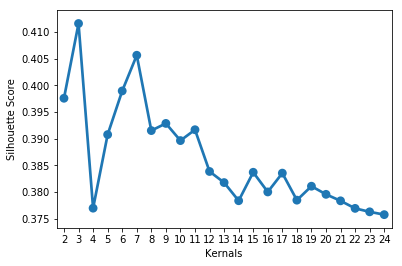

In [133]:
import matplotlib as plt
%matplotlib inline
sns.pointplot(x='Kernals', y = 'Silhouette Score', data = Kdf)

It appears that the optimal number of kernals is 3, though perhaps 7 will work better if it appears that 3 is not enough. Below we create models for 3 and 7 kernals.

In [134]:
# KMeans model with 3 clusters 
km3 = KMeans(n_clusters = 3, init = 'random')
# KMeans model with 7 clusters
km7 = KMeans(n_clusters = 7, init = 'random')

Next tran DBscan and the 2 Kmeans labels.

In [122]:
# import the sklearn DBscan and SpectralClustering libraries
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

cluster = tsneMatrix

cluster['cluster3kmean'] = km3.fit_predict(tsneMatrix)
cluster['cluster7kmean'] = km7.fit_predict(tsneMatrix)
cluster['clusterdbscan'] = DBSCAN(eps=1.0).fit_predict(tsneMatrix)

Next we create what was ultimately used, a spectral clustering model with neareast neighbors affinity and kmeans labels.

In [141]:
# create a copy of the tsneMatrix
ClusteredM = tsneMatrix

# create the Spectral Clustering object
sc = SpectralClustering(affinity = 'nearest_neighbors', assign_labels = 'kmeans')

# fit the cluster labels 
ClusteredM['cluster'] = sc.fit_predict(tsneMatrix)

# print the unique cluster counts.
np.unique(ClusteredM.cluster)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [142]:
# format the clustered data frame
ClusteredM.head()
t = ClusteredM.reset_index()
t.columns = ['word', 'x_coord', 'y_coord', 'cluster']

### Plotting with Bokeh

In [ ]:
Next we will plot the results.

In [143]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [166]:
#add our DataFrame as a ColumnDataSource for Bokeh
#plot_data = ColumnDataSource(tsneMatrix)
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.io import output_file, show




tsne_plot = figure(title=u't-SNE Word Embeddings',
                   output_backend="webgl",
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'), #, resize
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@words') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 0]),
                 color=u'Purple', line_alpha=0.2, fill_alpha=0.1, 
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 1]),#legend = u'cluster',
                 color=u'navy', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 2]),#legend = u'cluster',
                color=u'orange', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 3]),#legend = u'cluster',
                 color=u'red', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 4]),#legend = u'cluster',
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 5]),#legend = u'cluster',
                 color=u'yellow', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 6]),#legend = u'cluster',
                 color=u'green', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 7]),#legend = u'cluster',
                 color=u'pink', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
#show(tsne_plot);
output_file('PizzaClusteringWebGL.html')
#show(tsne_plot)

Above is the plot for the final clustering model.